In [1]:
import pandas as pd, numpy as np
import pymc as pm
import seaborn as sns
sns.set_theme()

In [2]:
data = pd.DataFrame({
    "Pump":[1,2,3,4,5,6,7,8,9,10],
    "Failures":[5,1,5,14,3,19,1,1,4,22],
    "Time":[94.32,15.72,62.88,125.76,5.24,31.44,1.05,1.05,2.10,10.48]
    })

In [3]:
data["Failures"] / data["Time"]

0    0.053011
1    0.063613
2    0.079517
3    0.111323
4    0.572519
5    0.604326
6    0.952381
7    0.952381
8    1.904762
9    2.099237
dtype: float64

In [4]:
p = (data["Pump"] - 1).to_numpy()
y = data["Failures"].to_numpy()
t = data["Time"].to_numpy()

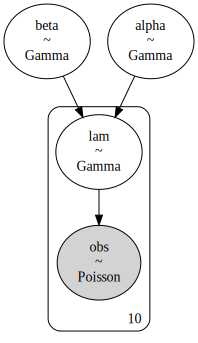

In [8]:
with pm.Model() as model:
    alpha = 1.8
    gamma = 0.01
    delta = 1   

    beta = pm.Gamma("beta", alpha=gamma, beta=delta)
    alpha = pm.Gamma("alpha", alpha=gamma, beta=delta)
    lam = pm.Gamma("lam", alpha=alpha, beta=beta, shape=len(data))

    mu = lam[p] * t[p]

    obs = pm.Poisson("obs", mu=mu, observed=y)
pm.model_to_graphviz(model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, lam]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


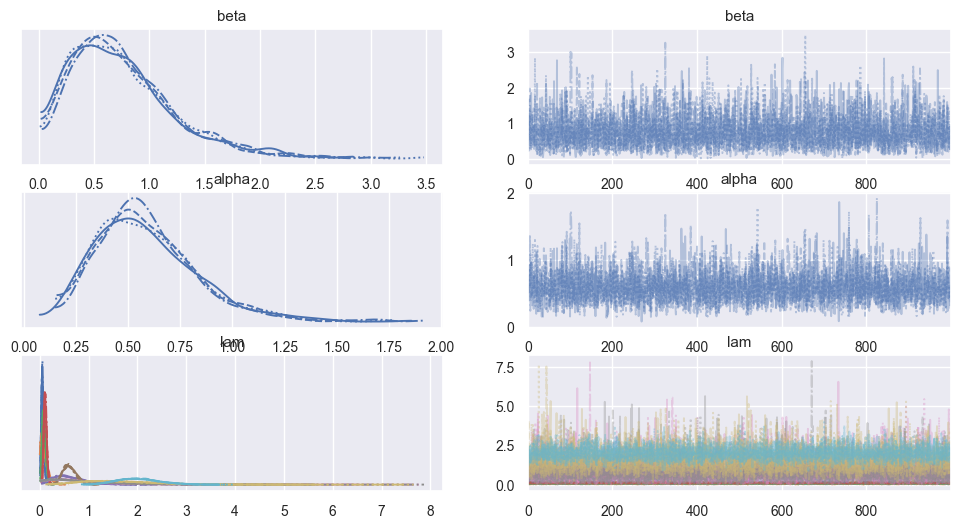

In [9]:
with model:
    trace = pm.sample()
    pm.plot_trace(trace)

array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

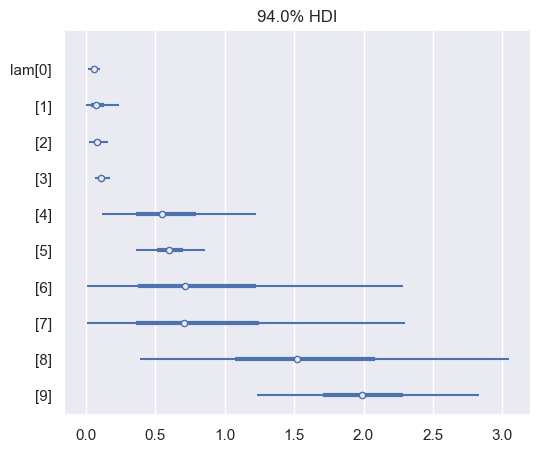

In [11]:
pm.plot_forest(trace, var_names=["lam"], combined=True)